In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np

In [2]:
gang = pd.read_csv('../data/data_big_sep2015/gang_data.csv')
gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])
slurm = pd.read_csv('../data/data_big_sep2015/slurm_data.csv',error_bad_lines=True,header=None)
slurm[1]=pd.to_datetime(slurm[1])
slurm[2]=pd.to_datetime(slurm[2])
slurm[3]=pd.to_timedelta(slurm[3],coerce=True)

In [ ]:
strt = 33
todo = 700
sm = [];
bg = [];
n = 0
dt = (gang['Timestamp'][1]-gang['Timestamp'][0]).seconds
T = (gang['Timestamp'].irow(-1)-gang['Timestamp'][0]).seconds
for index in range(strt,strt+todo):
    
    pick = 'midway'+str(index).zfill(3)
    sub = pick+'|Timestamp'  
    subgang = gang.filter(regex=sub)
    subgang.columns=["".join(col.lstrip(pick).split()) for col in subgang.columns]
    subslurm = slurm[slurm[0]==pick]
    
    if('domain_a_avgpwr' in subgang):
        bg.append( dt*(subgang['cpu_user'].sum()+subgang['cpu_system'].sum())/100.)
        tt = (subslurm[2]-subslurm[1]).sum()
        if(tt is not pd.NaT):
            sm .append( tt.seconds)
            n = n+1
s = np.array(sm)
b = np.array(bg)

(array([ 13.,   4.,   2.,   5.,   4.,   4.,   1.,  12.,  30.,  54.,  88.,
         61.,  49.,  30.,  28.,  34.,  21.,  15.,  34.,   9.]),
 array([  4.35063599e-02,   3.51243026e+01,   7.02050988e+01,
          1.05285895e+02,   1.40366691e+02,   1.75447487e+02,
          2.10528284e+02,   2.45609080e+02,   2.80689876e+02,
          3.15770672e+02,   3.50851468e+02,   3.85932265e+02,
          4.21013061e+02,   4.56093857e+02,   4.91174653e+02,
          5.26255449e+02,   5.61336246e+02,   5.96417042e+02,
          6.31497838e+02,   6.66578634e+02,   7.01659431e+02]),
 <a list of 20 Patch objects>)

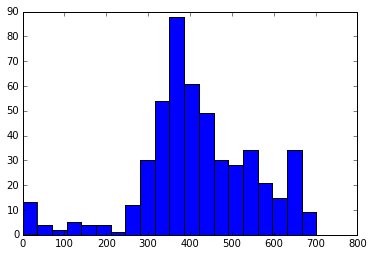

In [53]:
plt.hist(b/60./60.,20)

In [60]:
np.sum(b)/60./60./n/24./30.

0.58111485036871158